# Bank Churn Prediction

- El objetivo de este ejercicio es generar un modelo supervisado que permita establecer si un cliente bancario dejará de serlo.
- El dataset fue obtenido desde Kaggle (https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data)
- Los datos presentes son una recopilación de 10.000 clientes distintos, clasificados según 14 variables. Dentro de estas variables tenemos de tipo cualitativo y cuantitativo.

***
Variables:

- 'RowNumber'      : El número de fila. Es utilizado como índice.
- 'CustomerId'     : La ID del usuario, número único por cliente.
- 'Surname'        : Apellido del cliente.
- 'CreditScore'    : Calificación crediticia, número entre 300 y 850 que indica la solvencia del cliente para pagar deudas.
- 'Geography'      : País del cliente.
- 'Gender'         : Género del cliente.
- 'Age'            : Edad del cliente.
- 'Tenure'         : Tiempo en años que el cliente ha permanecido en el banco.
- 'Balance'        : Monto que el cliente tiene en sus cuentas.
- 'NumOfProducts'  : Cantidad de productos que el cliente tiene contratado con el banco.
- 'HasCrCard'      : Posesión de tarjeta de crédito (1: si, 0: no)
- 'IsActiveMember' : Si el cliente es miembro activo. (1: si, 0: no)
- 'EstimatedSalary': Salario estimado del cliente. (USD/YR)
- 'Exited'         : Si es que el cliente se fue del banco. (1: si, 0: no)
***


# Objetivo.

Necesitamos predecir si un cliente se retirará del banco. Apoyado en técnicas de Machine Learning, se desarrollaron modelos y se comparó su presición.

In [192]:
#Importar librerías.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.classifier import ConfusionMatrix
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
#Leer archivo .csv

df = pd.read_csv('Churn Modeling.csv')
df_original = df.copy()

# 1.   Exploratory Data Analysis.

In [3]:
dimensiones = df.shape
print(f'El dataframe "df" contiene {dimensiones[0]} filas y {dimensiones[1]} columnas.')

El dataframe "df" contiene 10000 filas y 14 columnas.


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Resumen

- El DataFrame contiene __10.000 entradas__. De la totalidad, podemos ver que no hay valores faltantes.
- Hay variables que son categóricas y pueden ser transformadas a númericas aplicando un __Encoding__.
- La columna 'RowNumber' no es de gran aporte al DataFrame, debido a la utilización del índice.



A continuación, se creó una función para obtener el porcentaje de valores presentes en una columna, definida como _'porcentaje'_ 

In [8]:
def porcentaje(df, column_name):
    # Calcula las cantidades y proporciones
    counts = df[column_name].value_counts()
    ratios = 100 * df[column_name].value_counts() / len(df)

    # Crea un DataFrame
    summary_df = pd.DataFrame({column_name: counts, 'Ratio': ratios})

    # Aplica formato a las proporciones
    summary_df['Ratio'] = summary_df['Ratio'].apply(lambda x: f'{x:.2f}%')

    return summary_df

In [9]:
porcentaje(df, 'Exited')

,Exited,Ratio
0,7963,79.63%
1,2037,20.37%


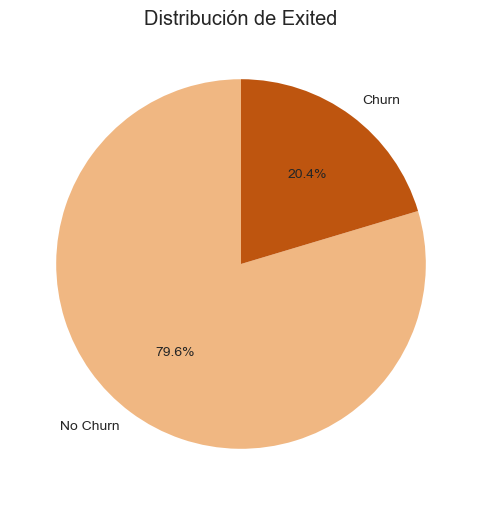

In [10]:
data = df['Exited'].value_counts()
labels = ['No Churn', 'Churn']
colors = ['#f0b782', '#be550f']

plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, colors= colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Exited')

plt.show()


Podemos apreciar que el dataset está desbalanceado, donde solamente un __20.37% de los clientes__ salió del banco. Por lo que será necesario balancear los datos más adelante.
***

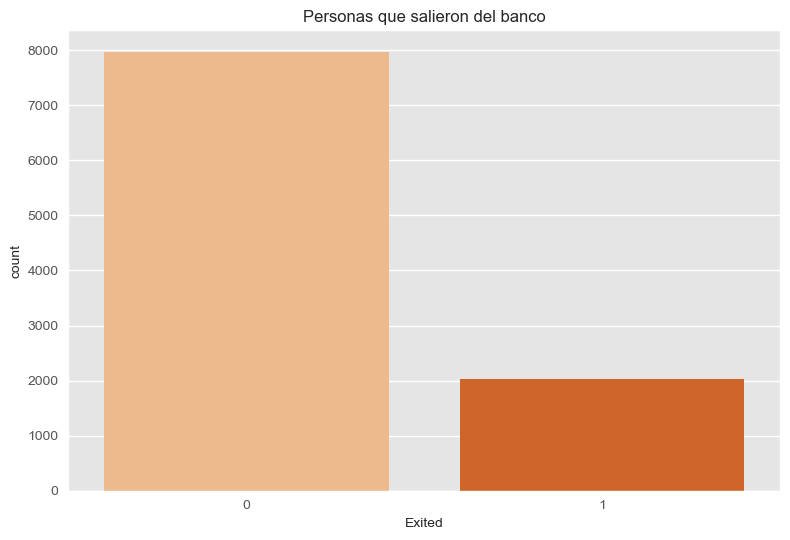

In [11]:
plt.style.use('ggplot')
sns.countplot(x= 'Exited', data= df, palette= 'Oranges')

plt.title("Personas que salieron del banco", fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
#Correlación entre variables

corr = df.corr()
corr['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

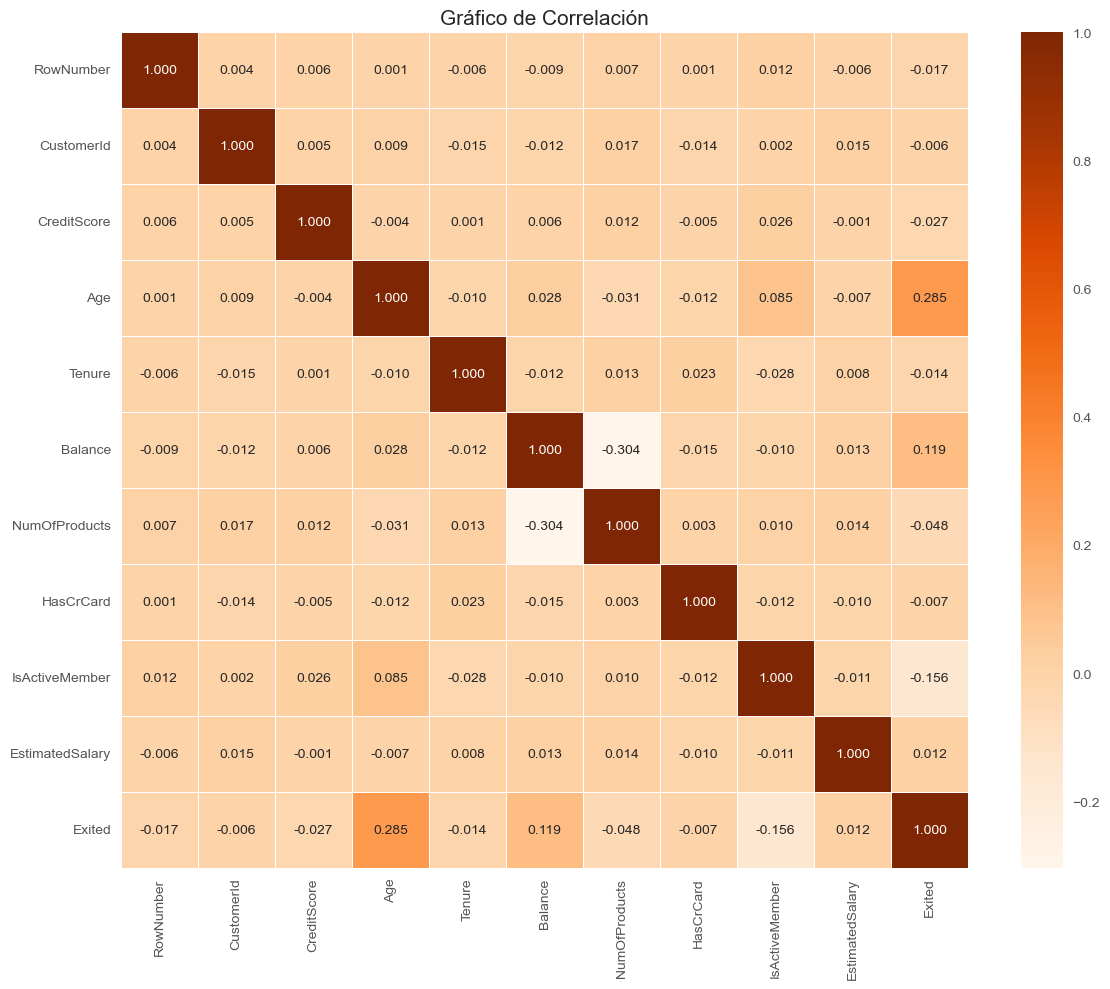

In [13]:
#Correlación entre variables
plt.style.use('ggplot')
plt.figure(figsize=(12,10))

correlacion = df.corr()

sns.heatmap(correlacion, annot=True, linewidth=.5, fmt= '.3f', cmap= 'Oranges')

plt.title("Gráfico de Correlación", fontsize=15)

plt.tight_layout()
plt.show()

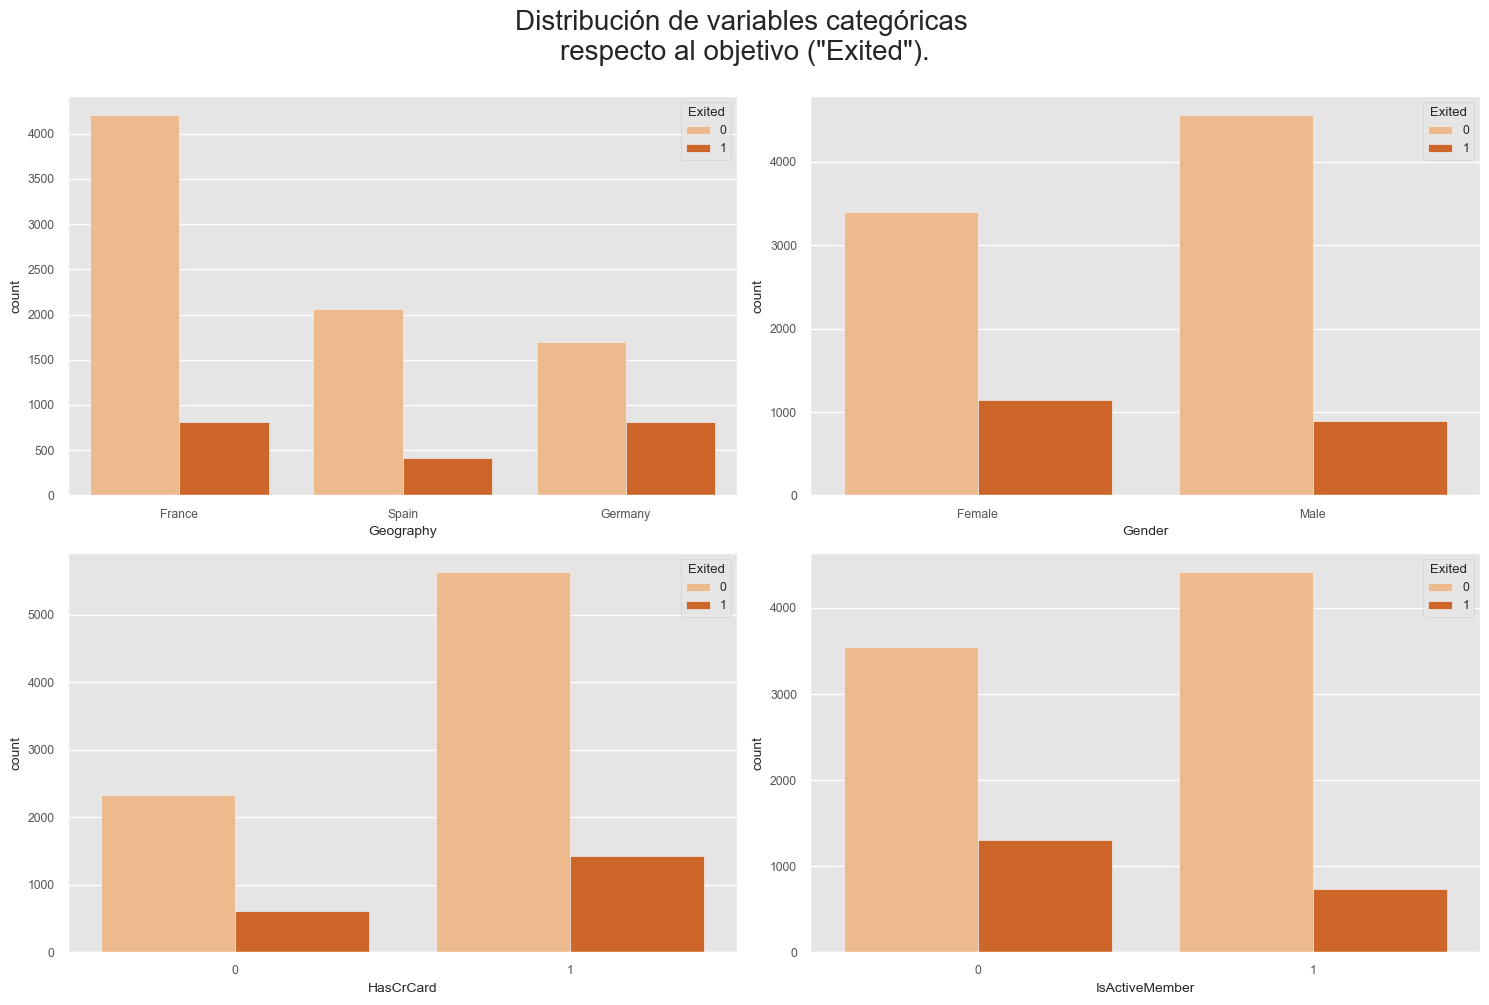

In [137]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

my_cmap = "Oranges"

# Crea subplots
sns.countplot(x = "Geography", hue="Exited", data = df_original, ax= ax[0][0], palette=my_cmap)
sns.countplot(x = "Gender", hue="Exited", data = df_original, ax= ax[0][1], palette=my_cmap)
sns.countplot(x = "HasCrCard", hue="Exited", data = df_original, ax= ax[1][0], palette=my_cmap)
sns.countplot(x = "IsActiveMember", hue="Exited", data = df_original, ax= ax[1][1], palette=my_cmap)

fig.suptitle('Distribución de variables categóricas \nrespecto al objetivo ("Exited").', fontsize=20, y=1)

plt.tight_layout()
plt.show()

***
##### Información de los gráficos:
1. La mayor cantidad de clientes es de _Francia_, pero la mayor cantidad de personas que salieron del banco respecto de la cantidad de clientes es __Alemania__. 
1. La mayor parte de los clientes es _hombre_, pero la mayor cantidad de personas que salieron del banco son __mujeres__.
1. La mayor cantidad de clientes que ha salido __tenía tarjeta de crédito__.
1. Los __miembros inactivos__ son los que más tienden a salir.

***

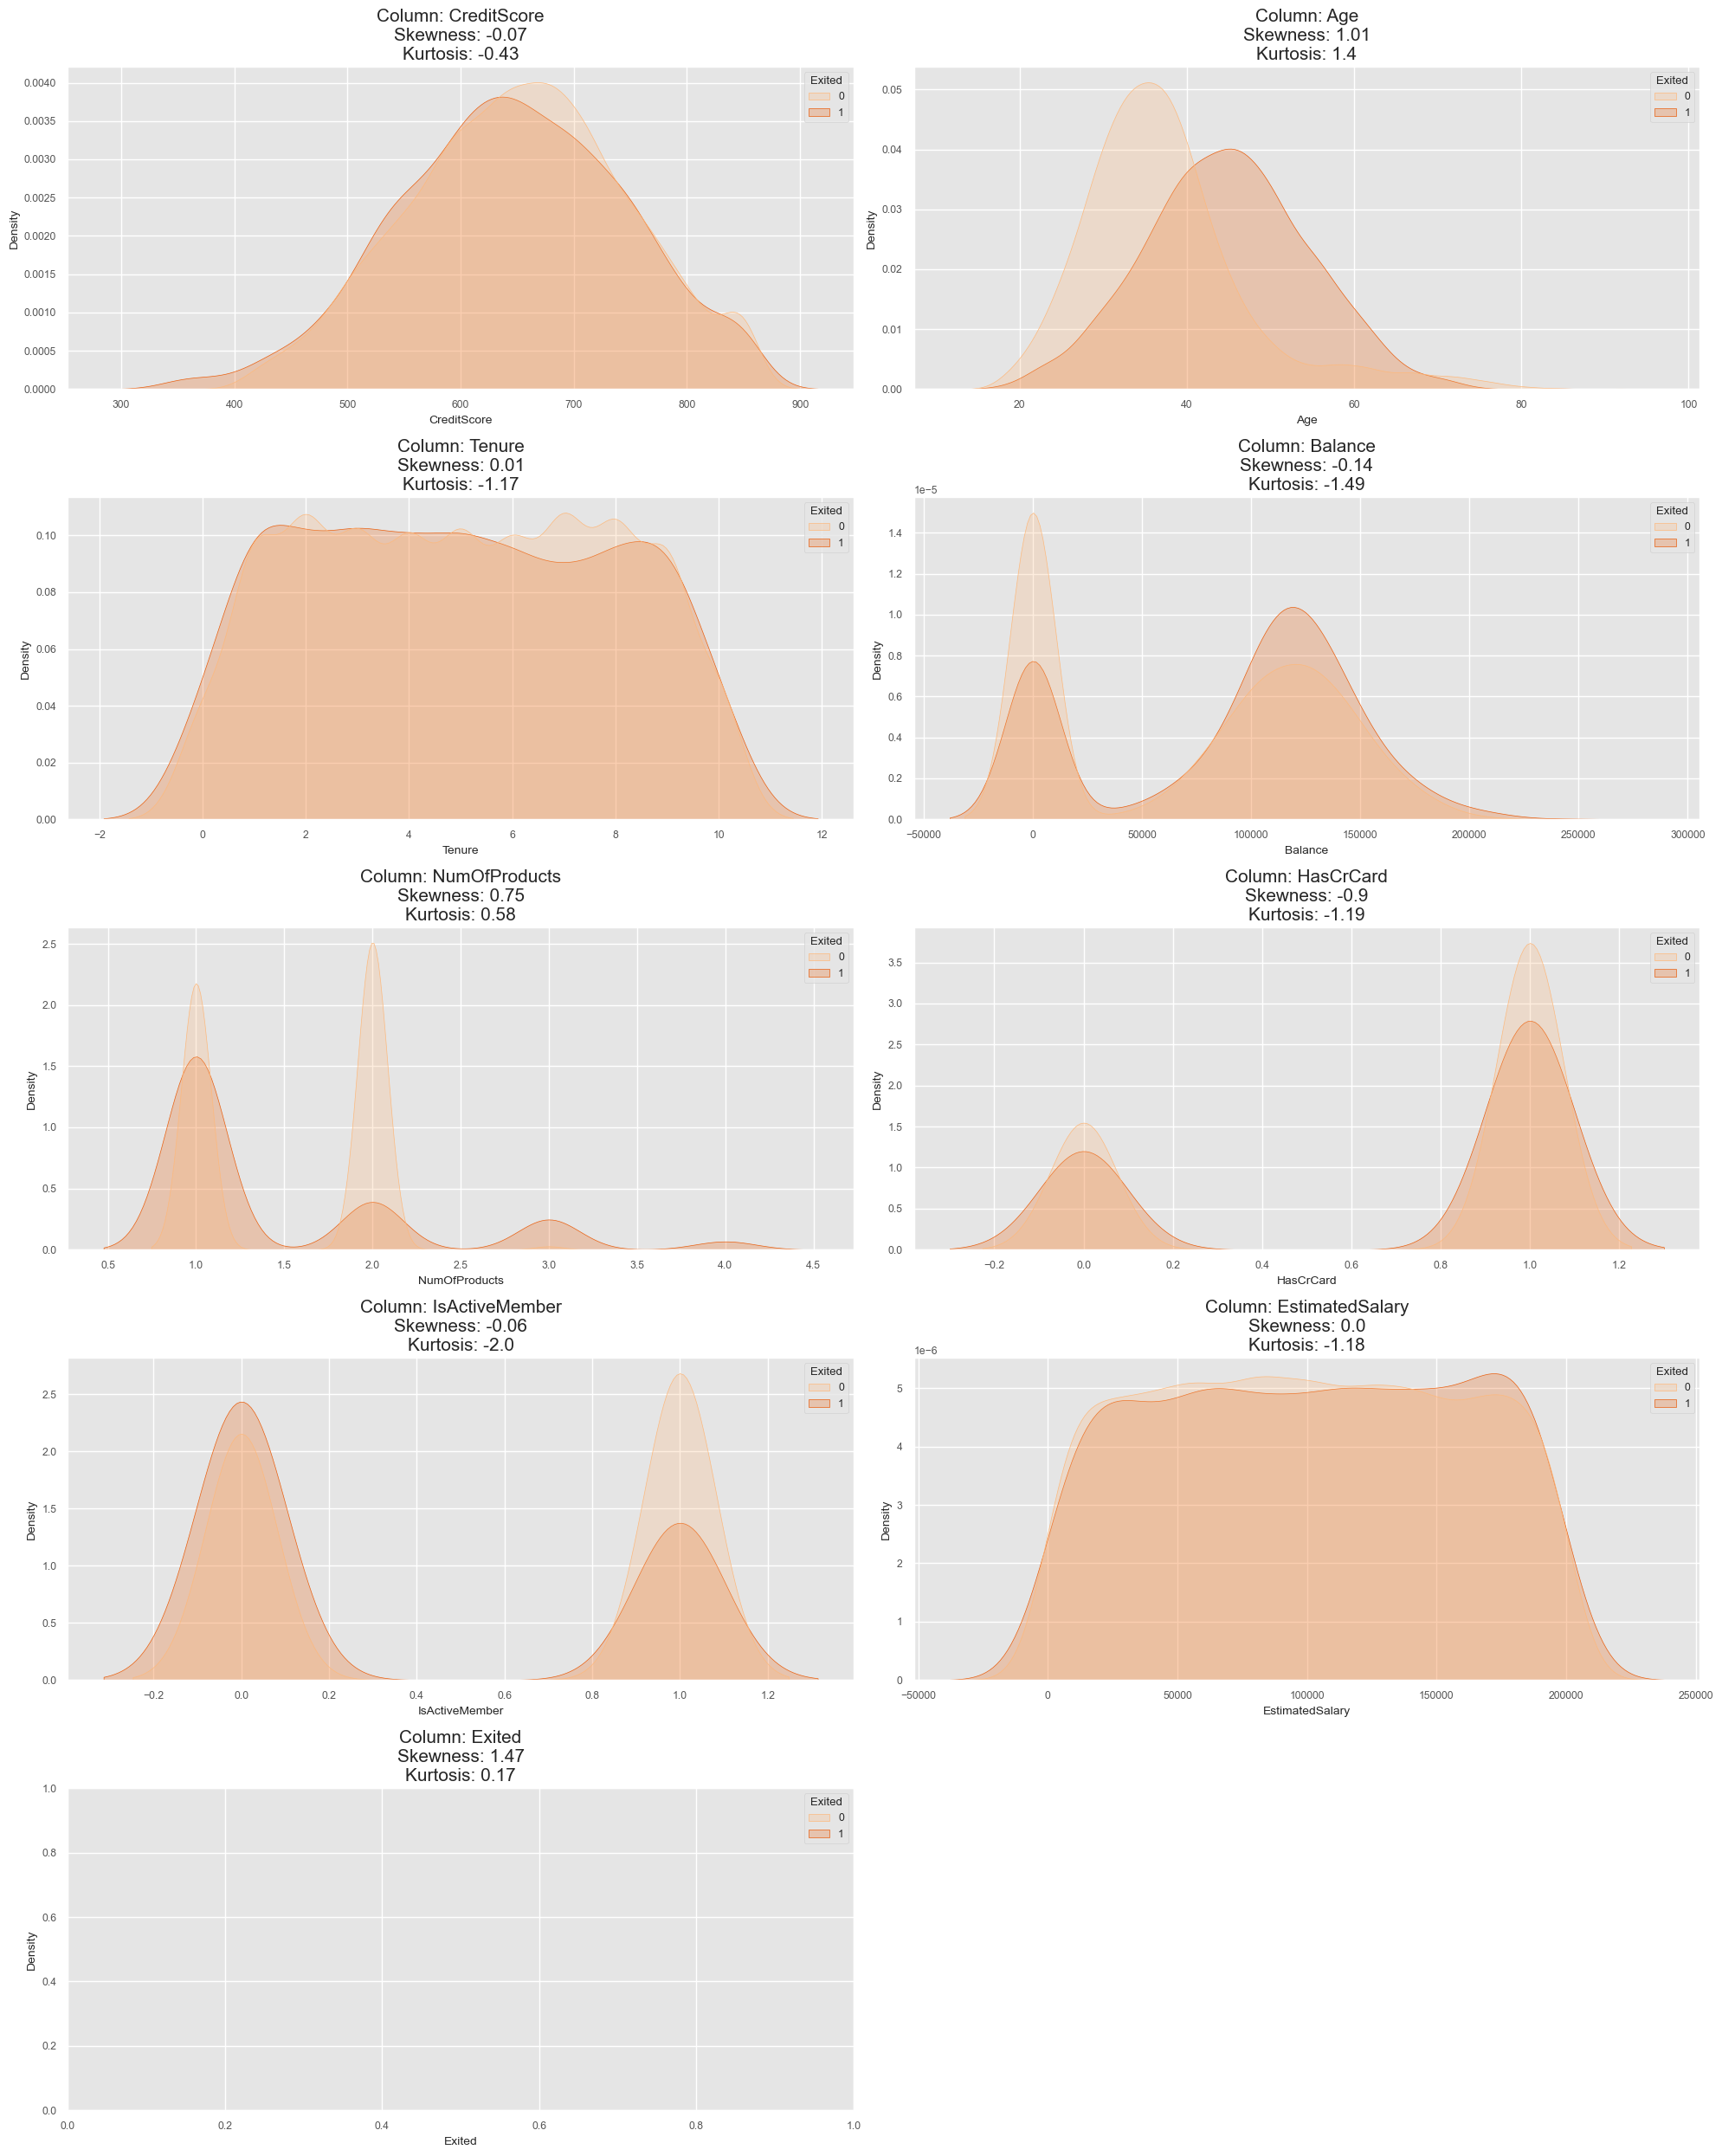

In [126]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 25))

num_rows = 5
num_cols = 2
total_subplots = num_rows * num_cols

for i, col in enumerate(numerical_df):
    if i >= total_subplots:
        break
    
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(data=numerical_df, x=col, hue='Exited', fill=True, common_norm=False, palette='Oranges')
    plt.title(f'Column: {col}\nSkewness: {np.round(numerical_df[col].skew(), 2)}\nKurtosis: {np.round(numerical_df[col].kurt(), 2)}',
              fontdict={'fontsize': 15})

plt.tight_layout()
plt.show()

***
##### Información de los gráficos:
- La edad de la mayor cantidad de gente que tiende a salir del banco rodea los __40-45 años__.
- Hay gente que sale del banco con la __cuenta vacía__ como también __con dinero en ella__.
- La mayor cantidad de gente que se retira tiene __1 solo producto__ con el banco.
- Clientes se retiran del banco en su mayoría __teniendo tarjeta de crédito__.
- Ser __miembro inactivo__ _podría_ gatillar el Churn.
***

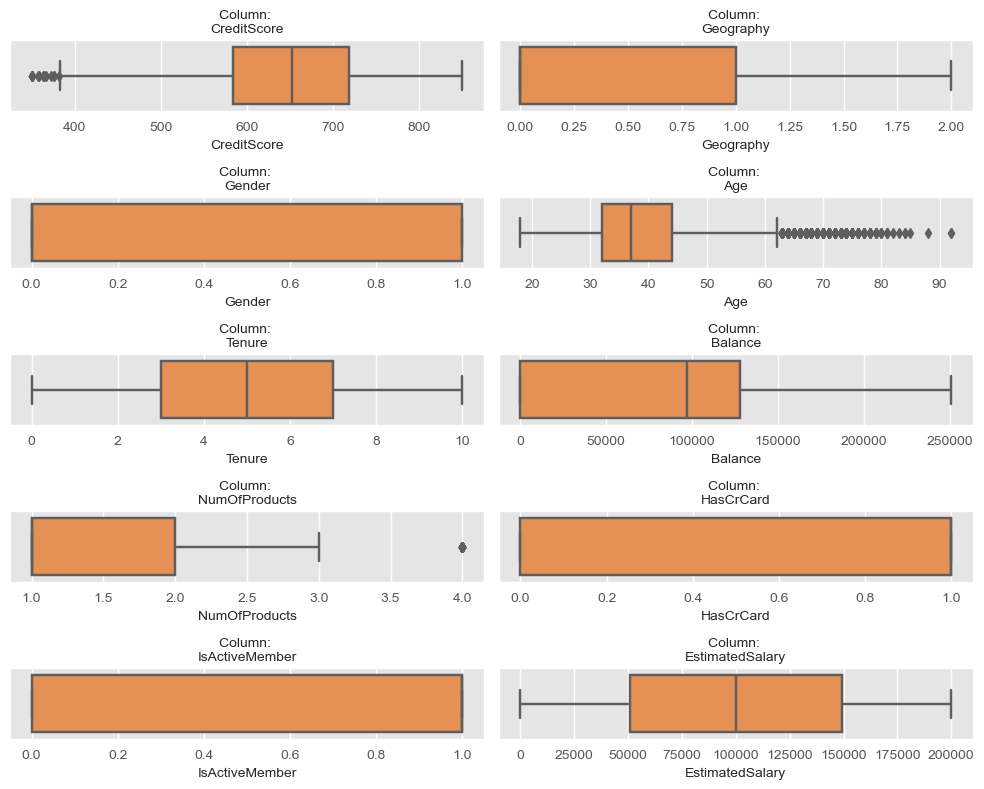

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))

num_rows = 5
num_cols = 2
total_subplots = num_rows * num_cols

for i, col in enumerate(numerical_df):
    if i >= total_subplots:
        break
    
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=numerical_df[col], palette='Oranges')
    plt.title(f'Column: \n{col}', fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

# 2. Preprocessing
### Encoding de variables categóricas
Como son pocas las variables que tienen datos cualitativos, se asignaron dummies manualmente.

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
paises = {'France': 0, 'Germany': 1, 'Spain': 2}
df.replace(paises, inplace= True)

In [17]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
genero = {'Male': 0, 'Female': 1}
df.replace(genero, inplace = True)

### Separación de columnas numéricas y categóricas

Las columnas 'RowNumber' y 'Surname' y 'CustomerId' no aportan en gran manera al dataset, por lo que serán eliminadas

In [19]:
remover = ['RowNumber', 'Surname', 'CustomerId']
df.drop(columns= remover, inplace = True)

In [20]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

categorical_df = df[categorical_cols]
numerical_df = df[numerical_cols]

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


### Balanceo de datos

Para poder balancear los datos y prevenir el data leakage, será necesario dividir en datos de entrenamiento y test.

In [30]:
y= df.Exited

X = df.drop(columns='Exited')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

***

In [32]:
#Random OverSampler

oversampler = RandomOverSampler(random_state=1)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

In [33]:
#Random UnderSampler

undersampler = RandomUnderSampler(random_state=1)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

***
# 3. Construcción de modelos

Para este caso, necesitamos hacer una predicción de la variable 'Exited', por lo que necesitaremos un modelo de clasificación. Las alternativas que manejaremos será:

1. DecisionTreeClassifier
1. RandomForestClassifier
1. XGBoostClassifier
1. LGBM


Para clasificar la precisión del modelo usaremos Matriz de Confusión y Classification Report.

_Además, testearemos las distintas maneras de balancear el dataset, como se hizo en la etapa anterior. (RandomOverSampler y RandomUnderSampler)_

Después de crear y medir las predicciones, comentaremos cuál es la mejor opción dentro de cada iteración.
***

### 1. DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1585
           1       0.48      0.50      0.49       415

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



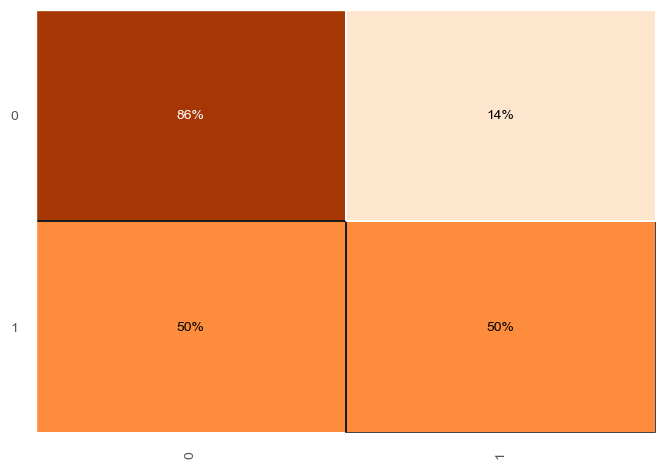

In [91]:
#DecisionTreeRegressor sin modificación de variables

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

cm = ConfusionMatrix(dt_model, percent=True, cmap = 'Oranges')
cm.fit(X_train, y_train)
accuracy_dt = cm.score(X_test, y_test)

f1score_dt = f1_score(y_test, dt_pred)

dt_cr = (classification_report(y_test, dt_pred))
print(dt_cr)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1585
           1       0.37      0.69      0.48       415

    accuracy                           0.69      2000
   macro avg       0.63      0.69      0.63      2000
weighted avg       0.78      0.69      0.72      2000



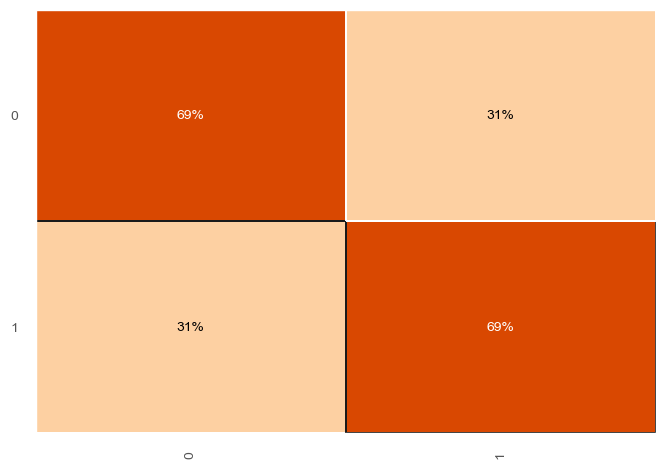

In [92]:
#DecisionTreeRegressor con UnderSampling

dt_model_us = DecisionTreeClassifier(random_state=1)
dt_model_us.fit(X_train_us, y_train_us)
dt_us_pred = dt_model_us.predict(X_test)

cm = ConfusionMatrix(dt_model_us, percent=True, cmap = 'Oranges')
cm.fit(X_train_us, y_train_us)
accuracy_dt_us = cm.score(X_test, y_test)

f1score_dt_us = f1_score(y_test, dt_us_pred)

dt_us_cr = (classification_report(y_test, dt_us_pred))
print(dt_us_cr)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1585
           1       0.52      0.47      0.50       415

    accuracy                           0.80      2000
   macro avg       0.69      0.68      0.69      2000
weighted avg       0.79      0.80      0.80      2000



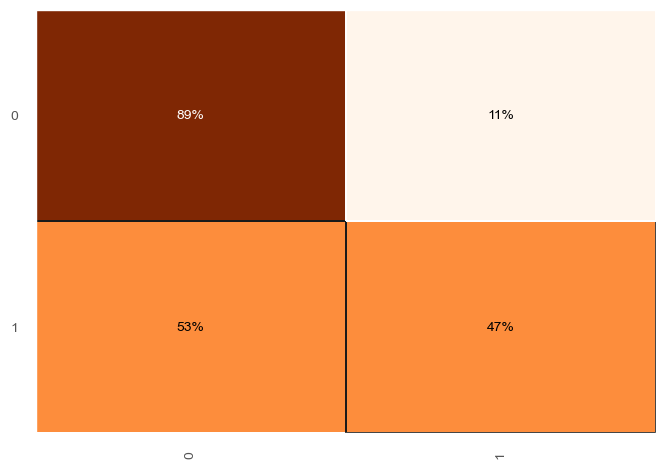

In [93]:
#DecisionTreeRegressor con OverSampling

dt_model_os = DecisionTreeClassifier(random_state=1)
dt_model_os.fit(X_train_os, y_train_os)
dt_os_pred = dt_model_os.predict(X_test)

cm = ConfusionMatrix(dt_model_os, percent=True, cmap = 'Oranges')
cm.fit(X_train_os, y_train_os)
accuracy_dt_os = cm.score(X_test, y_test)

f1score_dt_os = f1_score(y_test, dt_os_pred)

dt_os_cr = (classification_report(y_test, dt_os_pred))
print(dt_os_cr)

### Conclusión DesicionTree:
El modelo tiene el mejor desempeño clasificando la salida de clientes es __DesicionTree con Undersampler aplicado__. A pesar de tener un acierto del 68% en verdaderos positivos, es el que posee un mayor porcentaje de verdaderos negativos.

In [110]:
decisiontree = {
    'Modelo': 'DecisionTreeClassifier',
    'Escalado': 'Sin escalado',
    'Precisión': format(accuracy_dt, f".{3}f"),
    'F1' : format(f1score_dt, f".{3}f")
}

decisiontree_us = {
    'Modelo': 'DecisionTreeClassifier',
    'Escalado': 'UnderSampler',
    'Precisión': format(accuracy_dt_us, f".{3}f"),
    'F1' : format(f1score_dt_us, f".{3}f")
}

decisiontree_os = {
    'Modelo': 'DecisionTreeClassifier',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_dt_os, f".{3}f"),
    'F1' : format(f1score_dt_os, f".{3}f")
}

conclusion_dt = pd.DataFrame([decisiontree, decisiontree_us, decisiontree_os])
conclusion_dt

,Modelo,Escalado,Precisión,F1
0,DecisionTreeClassifier,Sin escalado,0.782,0.488
1,DecisionTreeClassifier,UnderSampler,0.689,0.478
2,DecisionTreeClassifier,OverSampler,0.800,0.497


***
### 2. RandomForestClassifier

In [46]:
parameters = {'n_estimators': [10, 20, 25, 50, 100, 200],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7]
             }

model_rf = RandomForestClassifier()
grid_rf = RandomizedSearchCV(model_rf,
                             parameters,
                             cv = 5,
                             n_jobs = -1)

grid_rf.fit(X_train, y_train)

print('Estimators: ', grid_rf.best_estimator_.n_estimators)
print('Algorithm: ', grid_rf.best_estimator_.criterion)
print('max_depth: ', grid_rf.best_estimator_.max_depth)
print('min_samples_slit: ', grid_rf.best_estimator_.min_samples_split)
print('Score: ', grid_rf.best_score_)

Estimators:  25
Algorithm:  gini
max_depth:  11
min_samples_slit:  3
Score:  0.85625


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1585
           1       0.84      0.44      0.58       415

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



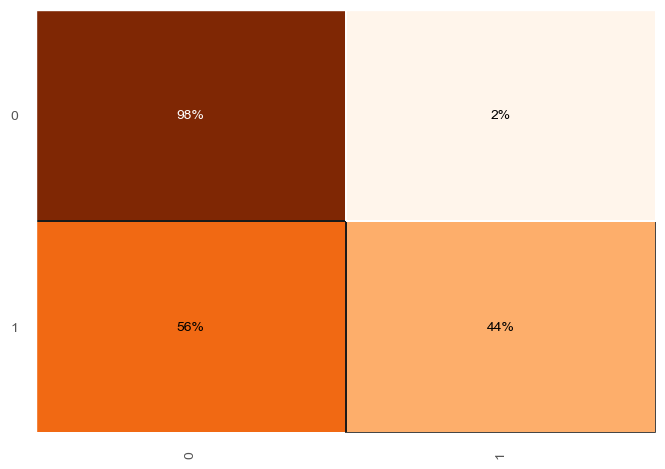

In [111]:
#RandomForestClassifier sin modificación de variables

model_random_forest = RandomForestClassifier(n_estimators = 25,
                                 min_samples_split =3,
                                 max_depth= 11,
                                 criterion = 'gini',
                                 random_state = 1)

model_random_forest.fit(X_train, y_train)
model_rf_pred = model_random_forest.predict(X_test)

cm = ConfusionMatrix(model_random_forest, percent=True, cmap = 'Oranges')
cm.fit(X_train, y_train)
accuracy_rf = cm.score(X_test, y_test)

f1score_rf = f1_score(y_test, model_rf_pred)

rf_cr = (classification_report(y_test, model_rf_pred))
print(rf_cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1585
           1       0.48      0.76      0.59       415

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.79      2000



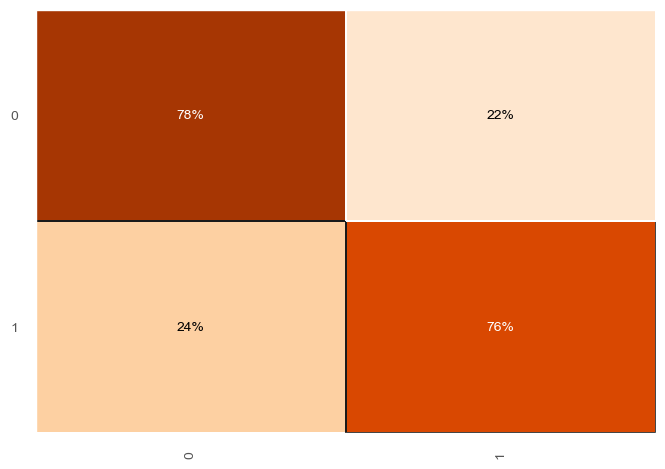

In [112]:
#RandomForestClassifier con UnderSampling

model_random_forest_us = RandomForestClassifier(n_estimators = 20,
                                 min_samples_split =7,
                                 max_depth= 7,
                                 criterion = 'gini',
                                 random_state = 1)

model_random_forest_us.fit(X_train_us, y_train_us)
model_rf_pred_us = model_random_forest_us.predict(X_test)

cm = ConfusionMatrix(model_random_forest_us, percent=True, cmap = 'Oranges')
cm.fit(X_train_us, y_train_us)
accuracy_rf_us = cm.score(X_test, y_test)

f1score_rf_us = f1_score(y_test, model_rf_pred_us)

rf_us_cr = (classification_report(y_test, model_rf_pred_us))
print(rf_us_cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1585
           1       0.54      0.74      0.62       415

    accuracy                           0.81      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.84      0.81      0.82      2000



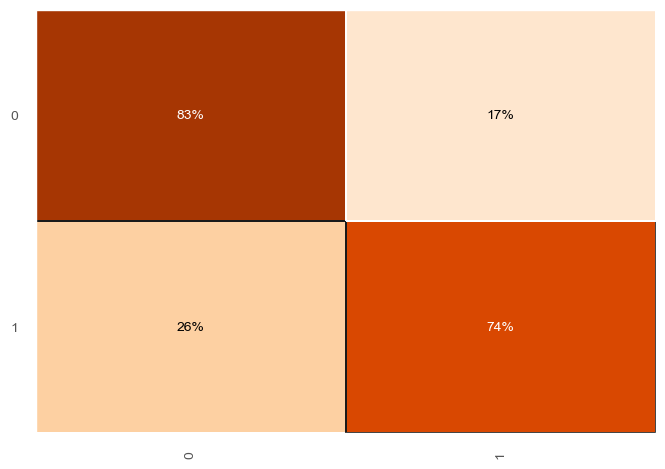

In [113]:
#RandomForestClassifier con OverSampling

model_random_forest_os = RandomForestClassifier(n_estimators = 20,
                                 min_samples_split =7,
                                 max_depth= 7,
                                 criterion = 'gini',
                                 random_state = 1)

model_random_forest_os.fit(X_train_os, y_train_os)
model_rf_pred_os = model_random_forest_os.predict(X_test)

cm = ConfusionMatrix(model_random_forest_os, percent=True, cmap = 'Oranges')
cm.fit(X_train_os, y_train_os)
accuracy_rf_os = cm.score(X_test, y_test)

f1score_rf_os = f1_score(y_test, model_rf_pred_os)

rf_os_cr = (classification_report(y_test, model_rf_pred_os))
print(rf_os_cr)

### Conclusión RandomForest:
El modelo tiene el mejor desempeño clasificando la salida de clientes es __RandomForest con Oversampler aplicado__. Tiene un acierto del 83% de los verdaderos positivos, y un 74% de los verdaderos negativos. Además de un mayor puntaje f1.

In [114]:
randomforest = {
    'Modelo': 'RandomForest',
    'Escalado': 'Sin escalado',
    'Precisión': format(accuracy_rf, f".{3}f"),
    'F1' : format(f1score_rf, f".{3}f")
}

randomforest_us = {
    'Modelo': 'RandomForest',
    'Escalado': 'UnderSampler',
    'Precisión': format(accuracy_rf_us, f".{3}f"),
    'F1' : format(f1score_rf_us, f".{3}f")
}

randomforest_os = {
    'Modelo': 'RandomForest',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_rf_os, f".{3}f"),
    'F1' : format(f1score_rf_os, f".{3}f")
}

conclusion_rf = pd.DataFrame([randomforest, randomforest_us, randomforest_os])
conclusion_rf

,Modelo,Escalado,Precisión,F1
0,RandomForest,Sin escalado,0.867,0.577
1,RandomForest,UnderSampler,0.776,0.586
2,RandomForest,OverSampler,0.814,0.623


***
### 3. XGBoostClassifier

In [53]:
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [5, 10, 25, 50, 100],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 5, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Learning Rate: ', xgb_grid.best_estimator_.learning_rate)
print('Max Depth: ', xgb_grid.best_estimator_.max_depth)
print('SubSamble: ', xgb_grid.best_estimator_.subsample)
print('Colsample Bytree: ', xgb_grid.best_estimator_.colsample_bytree)
print('N Estimators: ', xgb_grid.best_estimator_.n_estimators)
print('Gamma: ', xgb_grid.best_estimator_.gamma)
print('Reg Alpha: ', xgb_grid.best_estimator_.reg_alpha)
print('Reg Lambda: ', xgb_grid.best_estimator_.reg_lambda)


print('Score: ', xgb_grid.best_score_)

Learning Rate:  0.1
Max Depth:  7
SubSamble:  0.9
Colsample Bytree:  0.7
N Estimators:  100
Gamma:  0.3
Reg Alpha:  0.1
Reg Lambda:  0.7
Score:  0.8616249999999999


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1585
           1       0.79      0.49      0.61       415

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



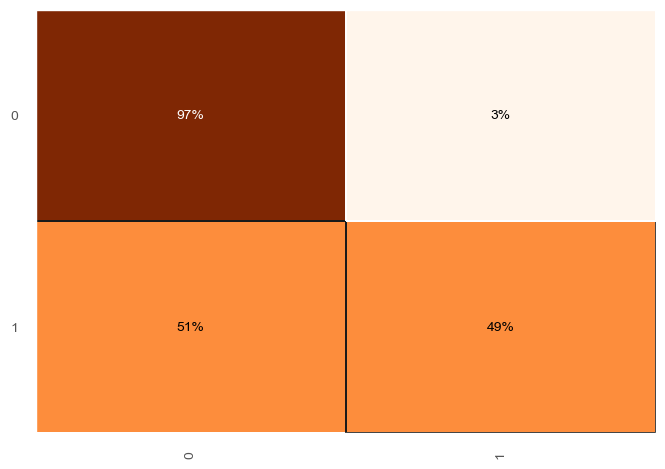

In [115]:
#XGBClassifier sin modificación de variables.

model_xgb = XGBClassifier(learning_rate = 0.1,
                          max_depth = 7,
                          subsample = 0.9,
                          colsample_bytree = 0.7,
                          n_estimators = 100,
                          gamma = 0.3,
                          reg_alpha = 0.1,
                          reg_lambda = 0.7,                          
                          random_state = 1)

model_xgb.fit(X_train, y_train)
xgb_preds = model_xgb.predict(X_test)

cm = ConfusionMatrix(model_xgb, percent=True, cmap = 'Oranges')
cm.fit(X_train, y_train)
accuracy_xgb = cm.score(X_test, y_test)

f1score_xgb = f1_score(y_test, xgb_preds)

xgb_cr = (classification_report(y_test, xgb_preds))
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1585
           1       0.48      0.76      0.59       415

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.79      2000



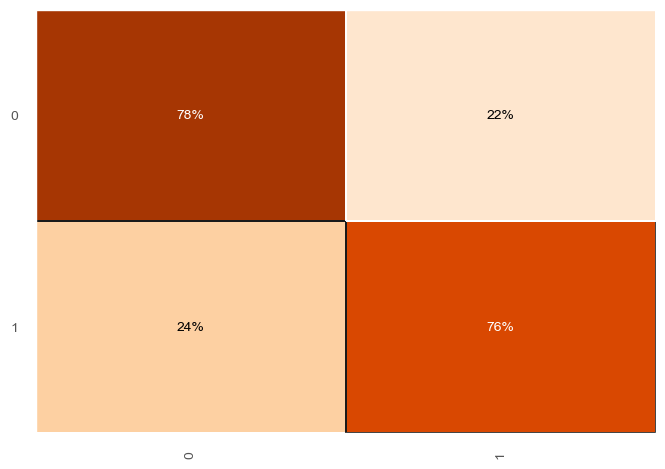

In [116]:
#XGBClassifier con UnderSampler

model_xgb_us = XGBClassifier(learning_rate = 0.1,
                          max_depth = 7,
                          subsample = 0.9,
                          colsample_bytree = 0.7,
                          n_estimators = 100,
                          gamma = 0.3,
                          reg_alpha = 0.1,
                          reg_lambda = 0.7,                          
                          random_state = 1)


model_xgb_us.fit(X_train_us, y_train_us)
xgb_preds_us = model_xgb_us.predict(X_test)

cm = ConfusionMatrix(model_xgb_us, percent=True, cmap = 'Oranges')
cm.fit(X_train_us, y_train_us)
accuracy_xgb_us = cm.score(X_test, y_test)

f1score_xgb_us = f1_score(y_test, xgb_preds_us)

xgb_us_cr = (classification_report(y_test, xgb_preds_us))
print(xgb_us_cr)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1585
           1       0.61      0.70      0.65       415

    accuracy                           0.84      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.85      0.84      0.85      2000



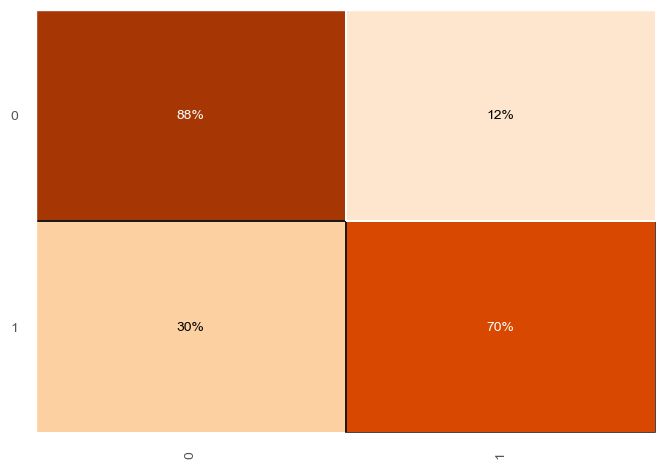

In [117]:
#XGBClassifier con OverSampler

model_xgb_os = XGBClassifier(learning_rate = 0.03,
                          max_depth = 9,
                          subsample = 0.5,
                          colsample_bytree = 0.7,
                          n_estimators = 100,
                          gamma = 0.5,
                          reg_alpha = 0.5,
                          reg_lambda = 0.9,                          
                          random_state = 1)

model_xgb_os.fit(X_train_os, y_train_os)
xgb_preds_os = model_xgb_os.predict(X_test)

cm = ConfusionMatrix(model_xgb_os, percent=True, cmap = 'Oranges')
cm.fit(X_train_os, y_train_os)
accuracy_xgb_os = cm.score(X_test, y_test)

f1score_xgb_os = f1_score(y_test, xgb_preds_os)

xgb_os_cr = (classification_report(y_test, xgb_preds_os))
print(xgb_os_cr)

### Conclusión XGBoost:
El modelo tiene el mejor desempeño clasificando la salida de clientes es __XGBoost con Oversampler aplicado__. Cuenta con un 88% de verdaderos positivos y un 70% de verdaderos negativos acertados y un mayor puntaje f1.

In [118]:
xgboost = {
    'Modelo': 'XGBoost',
    'Escalado': 'Sin escalado',
    'Precisión': format(accuracy_xgb, f".{3}f"),
    'F1' : format(f1score_xgb, f".{3}f")
}

xgboost_us = {
    'Modelo': 'XGBoost',
    'Escalado': 'UnderSampler',
    'Precisión': format(accuracy_xgb_us, f".{3}f"),
    'F1' : format(f1score_xgb_us, f".{3}f")
}

xgboost_os = {
    'Modelo': 'XGBoost',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_xgb_os, f".{3}f"),
    'F1' : format(f1score_xgb_os, f".{3}f")
}

conclusion_xgb = pd.DataFrame([xgboost, xgboost_us, xgboost_os])
conclusion_xgb

,Modelo,Escalado,Precisión,F1
0,XGBoost,Sin escalado,0.869,0.609
1,XGBoost,UnderSampler,0.779,0.588
2,XGBoost,OverSampler,0.844,0.650


### 4. LGBM

In [71]:
parameters = {'num_leaves': [5, 10, 20, 30, 40, 50],
              'max_depth': [-1, 1, 2, 3, 5, 7],
              'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7],
              'n_estimators': [20, 50, 75, 100, 150],
             }



model = LGBMClassifier()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 5, n_jobs = -1)
lgbm_grid.fit(X_train, y_train)

print('boosting_type: ', lgbm_grid.best_estimator_.boosting_type)
print('num_leaves: ', lgbm_grid.best_estimator_.num_leaves)
print('max_depth: ', lgbm_grid.best_estimator_.max_depth)
print('learning_rate: ', lgbm_grid.best_estimator_.learning_rate)
print('n_estimators: ', lgbm_grid.best_estimator_.n_estimators)


print('Score: ', lgbm_grid.best_score_)

[LightGBM] [Info] Number of positive: 1622, number of negative: 6378
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202750 -> initscore=-1.369195
[LightGBM] [Info] Start training from score -1.369195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 1622, number of negative: 6378
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202750 -> initscore=-1.369195
[LightGBM] [Info] Start training from score -1.369195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

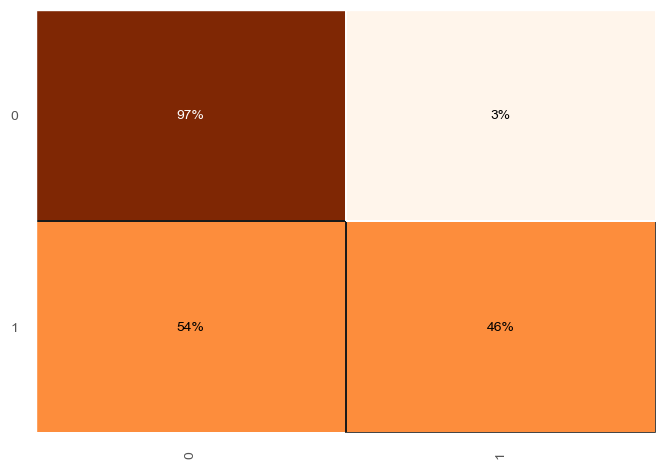

In [119]:
#LGBM sin modificación de variables.

lgbm_model = LGBMClassifier(boosting_type= 'gbdt',
                            num_leaves = 30,
                            max_depth = 3,
                            learning_rate = 0.2,
                            n_estimators = 50,
                            random_state=1)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

cm = ConfusionMatrix(lgbm_model, percent=True, cmap = 'Oranges')
cm.fit(X_train, y_train)
accuracy_lgbm = cm.score(X_test, y_test)

f1score_lgbm = f1_score(y_test, lgbm_pred)

lgbm_cr = (classification_report(y_test, lgbm_pred))
print(lgbm_cr)

[LightGBM] [Info] Number of positive: 1622, number of negative: 1622
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 3244, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

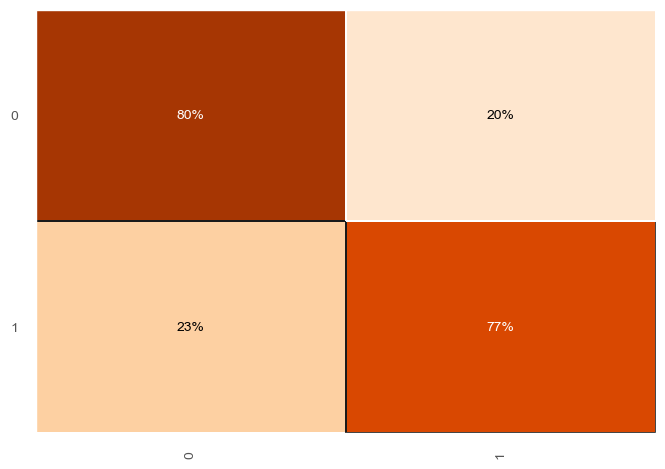

In [120]:
#LGBM con UnderSampler

lgbm_model_us = LGBMClassifier(boosting_type= 'gbdt',
                            num_leaves = 30,
                            max_depth = 3,
                            learning_rate = 0.2,
                            n_estimators = 50,
                            random_state=1)
lgbm_model_us.fit(X_train_us, y_train_us)
lgbm_pred_us = lgbm_model_us.predict(X_test)

cm = ConfusionMatrix(lgbm_model_us, percent=True, cmap = 'Oranges')
cm.fit(X_train_us, y_train_us)
accuracy_lgbm_us = cm.score(X_test, y_test)

f1score_lgbm_us = f1_score(y_test, lgbm_pred_us)

lgbm_cr_us = (classification_report(y_test, lgbm_pred_us))
print(lgbm_cr_us)

[LightGBM] [Info] Number of positive: 6378, number of negative: 6378
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 12756, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

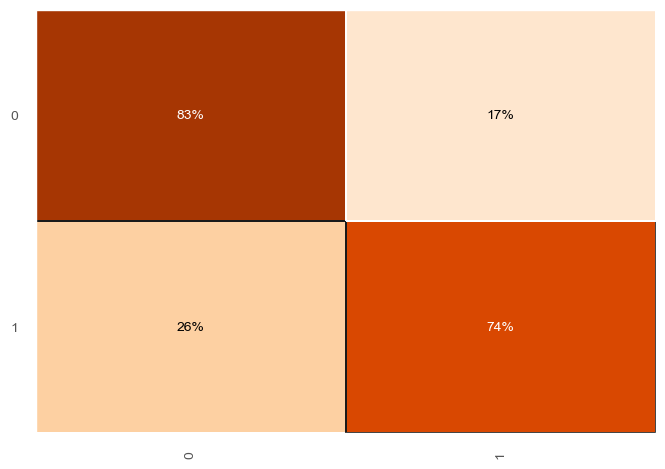

In [121]:
#LGBM con OverSampler

lgbm_model_os = LGBMClassifier(boosting_type= 'gbdt',
                            num_leaves = 30,
                            max_depth = 3,
                            learning_rate = 0.2,
                            n_estimators = 50,
                            random_state=1)
lgbm_model_os.fit(X_train_os, y_train_os)
lgbm_pred_os = lgbm_model_os.predict(X_test)

cm = ConfusionMatrix(lgbm_model_os, percent=True, cmap = 'Oranges')
cm.fit(X_train_os, y_train_os)
accuracy_lgbm_os = cm.score(X_test, y_test)

f1score_lgbm_os = f1_score(y_test, lgbm_pred_os)

lgbm_cr_os = (classification_report(y_test, lgbm_pred_os))
print(lgbm_cr_os)

### Conclusión LGBM:
El modelo que tiene el mejor desempeño clasificando la salida de clientes es __LGBM con Oversampler aplicado__. Cuenta con un 83% de verdaderos positivos y un 74% de verdaderos negativos acertados y un mayor puntaje f1.

In [122]:
lgbm = {
    'Modelo': 'LGBM',
    'Escalado': 'Sin escalado',
    'Precisión': format(accuracy_lgbm, f".{3}f"),
    'F1' : format(f1score_lgbm, f".{3}f")
}

lgbm_us = {
    'Modelo': 'LGBM',
    'Escalado': 'UnderSampler',
    'Precisión': format(accuracy_lgbm_us, f".{3}f"),
    'F1' : format(f1score_lgbm_us, f".{3}f")
}

lgbm_os = {
    'Modelo': 'LGBM',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_lgbm_os, f".{3}f"),
    'F1' : format(f1score_lgbm_os, f".{3}f")
}

conclusion_lgbm = pd.DataFrame([lgbm, lgbm_us, lgbm_os])
conclusion_lgbm

,Modelo,Escalado,Precisión,F1
0,LGBM,Sin escalado,0.864,0.582
1,LGBM,UnderSampler,0.795,0.610
2,LGBM,OverSampler,0.816,0.627


***
# 4. Finalización

A continuación, haremos una comparación de los cuatro modelos con mejor desempeño mediante la creación de un DataFrame.

In [125]:
decisiontree_us = {
    'Modelo': 'DecisionTreeClassifier',
    'Escalado': 'UnderSampler',
    'Precisión': format(accuracy_dt_us, f".{3}f"),
    'F1' : format(f1score_dt_us, f".{3}f")
}

randomforest_os = {
    'Modelo': 'RandomForestClassifier',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_rf_os, f".{3}f"),
    'F1' : format(f1score_rf_os, f".{3}f")
}

xgb_os = {
    'Modelo': 'XGBoostClassifier',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_xgb_os, f".{3}f"),
    'F1' : format(f1score_xgb_os, f".{3}f")
}

lgbm_os = {
    'Modelo': 'LGBM',
    'Escalado': 'OverSampler',
    'Precisión': format(accuracy_lgbm_os, f".{3}f"),
    'F1' : format(f1score_lgbm_os, f".{3}f")    
}

conclusion = pd.DataFrame([decisiontree_us, randomforest_os, xgb_os, lgbm_os])
conclusion

,Modelo,Escalado,Precisión,F1
0,DecisionTreeClassifier,UnderSampler,0.689,0.478
1,RandomForestClassifier,OverSampler,0.814,0.623
2,XGBoostClassifier,OverSampler,0.844,0.650
3,LGBM,OverSampler,0.816,0.627


El modelo que cuenta con una mayor precisión, y a la vez un mayor puntaje f1 es __XGBoostClassifier__. Ahora, con base a una funcion obtenida desde estudiaremos cuáles son las variables más importantes para este modelo.

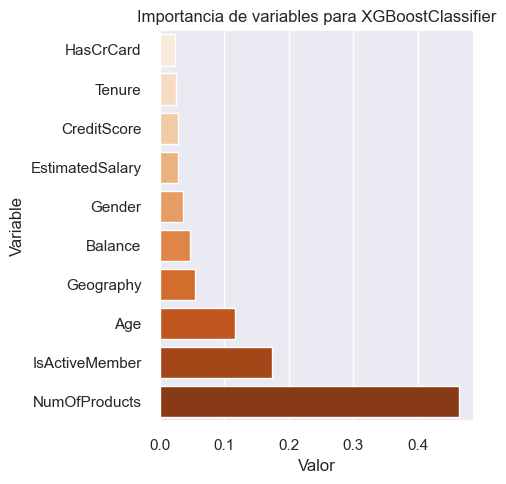

In [132]:
feature_imp = pd.DataFrame({'Valor': model_xgb_os.feature_importances_, 'Variable': X_train.columns})
plt.figure(figsize=(5, 5))
sns.set(font_scale=1)
sns.barplot(x="Valor", y="Variable",
            data=feature_imp.sort_values(by="Valor", ascending=True)[0:len(X)],
            palette= 'Oranges')

plt.title('Importancia de variables para XGBoostClassifier')

plt.tight_layout()
plt.show()

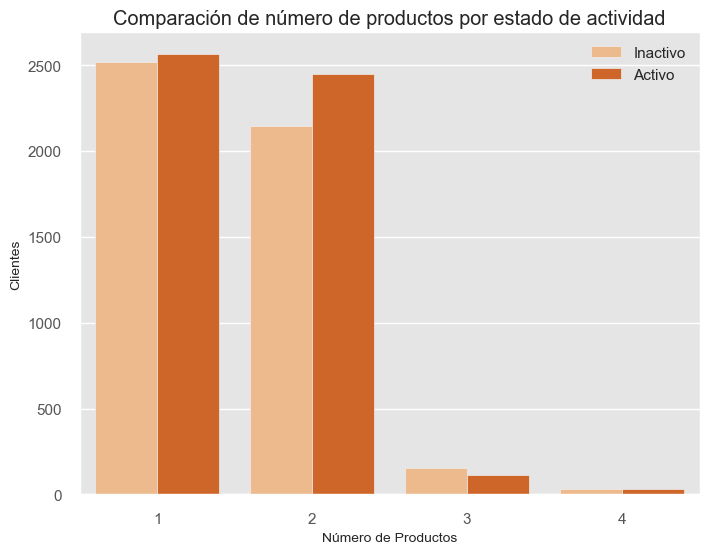

In [187]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='IsActiveMember', data=df_original, palette='Oranges')
plt.xlabel('Número de Productos')
plt.ylabel('Clientes')
plt.title('Comparación de número de productos por estado de actividad')

plt.legend(loc='upper right', labels=['Inactivo', 'Activo'], fancybox= True)


plt.show()

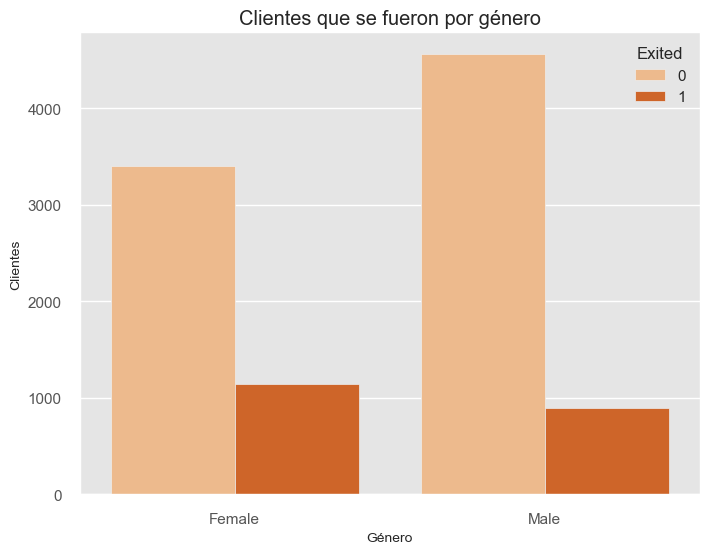

In [189]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df_original, palette='Oranges')
plt.xlabel('Género')
plt.ylabel('Clientes')
plt.title('Clientes que se fueron por género')


plt.show()

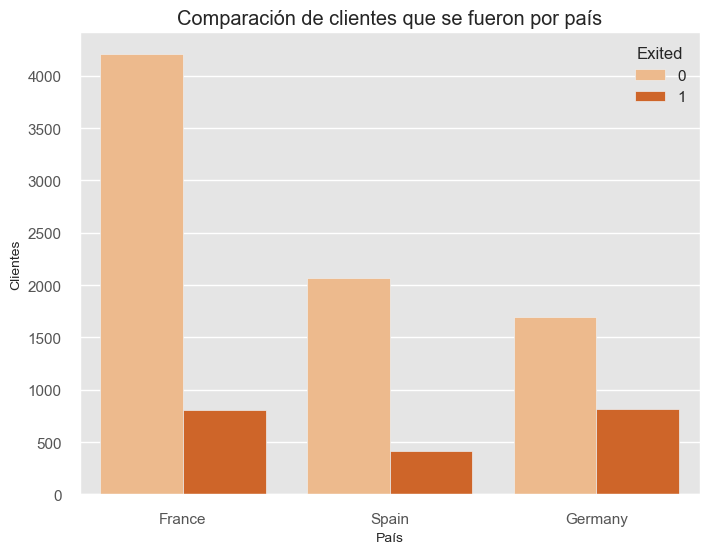

In [181]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df_original, palette='Oranges')
plt.xlabel('País')
plt.ylabel('Clientes')
plt.title('Comparación de clientes que se fueron por país')

plt.show()

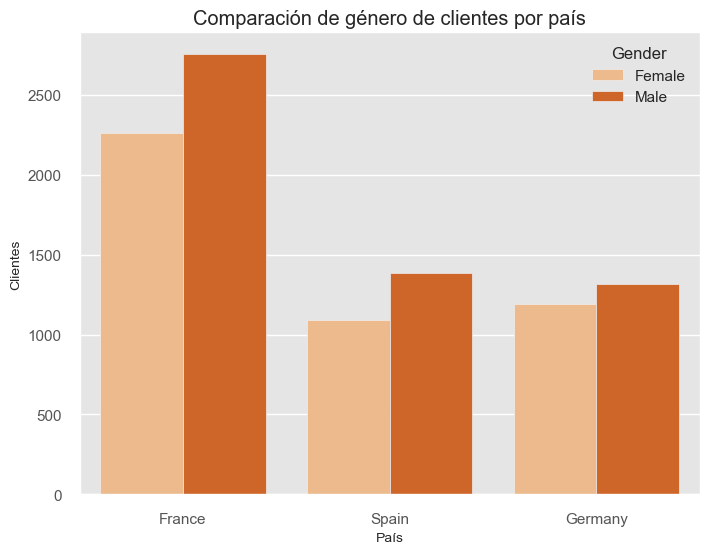

In [191]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=df_original, palette='Oranges')
plt.xlabel('País')
plt.ylabel('Clientes')
plt.title('Comparación de género de clientes por país')

plt.show()

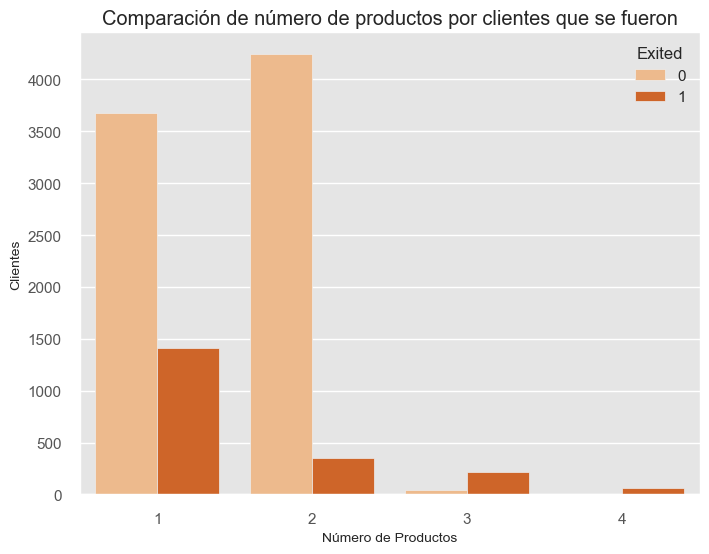

In [174]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Oranges')
plt.xlabel('Número de Productos')
plt.ylabel('Clientes')
plt.title('Comparación de número de productos por clientes que se fueron')

plt.show()

# Conclusión Final

- A modo de conclusión, podemos establecer que el conjunto de datos trabajados nos permite establecer satisfactoriamente un modelo de predicción con una precisión del __84,4%__. 

- Aparentemente la mejor manera de balancear los datos, en este caso, es mediante un __RandomOverSampler__, ya que entrega la mayor cantidad de Verdaderos Negativos (True Negative), cosa que al resto de modelos les complicó bastante aprender, por el contrario, aprendían con un alto valor de precisión el valor Verdadero Positivo, pero con una mala precisión el Verdadero Negativo.

- Como pudimos ver recientemente, las características que más impactaban al modelo de XGBoosClassifier son: __el número de productos, si el cliente es miembro activo y su edad__. Además, podemos establecer que las variables irrelevantes para la creación del modelo (que fueron eliminadas del DataFrame) son: _'RowNumber', 'CustomerId' y 'Surname'_. Estas variables no eran un aporte para el rendimiento del modelo además de de evitar el anonimato de los datos trabajados.

- Existe la posibilidad que este modelo __sufra de overfitting__, cosa que será estudio futuro, debido al uso del RandomOverSampler. Al generar datos sintéticos existe una gran posibilidad de que sea el caso. 

- Uno de los desafíos principales de este proyecto fue el cómo abordar el desbalanceo de datos. por ello se optó por probar con los datos sin modificación, con UnderSampler y con OverSampler.

- La mayor cantidad de clientes que se retira del banco tiene entre 1 y 2 productos con ellos. Los clientes que tienen más productos tienden a salir menos del banco, por lo que sería una buena y básica forma de afrontar esta situación el dar más productos a clientes y clientas. Como la proporción de Churn es más equitativa en Alemania, y hay menos clientes, sería bueno probar en ese país, a una escala más reducida que Francia o España, para ver si esa medida es más efectiva.